## **Piyusha Supe 23CO315**
**Practical 4 : Data Analytics 1**

Create a Linear Regression Model using Python/R to predict
home prices using Boston Housing Dataset
(https://www.kaggle.com/c/boston-housing). The Boston
Housing dataset contains information about various houses
in Boston through different parameters. There are 506
samplesand 14 feature variables in this dataset.
The objective is to predict the value of prices of the house
using the given features.

IMPORT LIBRARIES AND LOAD DATASET

In [1]:
from google.colab import drive
from google.colab import files
files.upload()

Saving boston.csv to boston.csv


{'boston.csv': b'CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV\n0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00\n0.02731,0.00,7.070,0,0.4690,6.4210,78.90,4.9671,2,242.0,17.80,396.90,9.14,21.60\n0.02729,0.00,7.070,0,0.4690,7.1850,61.10,4.9671,2,242.0,17.80,392.83,4.03,34.70\n0.03237,0.00,2.180,0,0.4580,6.9980,45.80,6.0622,3,222.0,18.70,394.63,2.94,33.40\n0.06905,0.00,2.180,0,0.4580,7.1470,54.20,6.0622,3,222.0,18.70,396.90,5.33,36.20\n0.02985,0.00,2.180,0,0.4580,6.4300,58.70,6.0622,3,222.0,18.70,394.12,5.21,28.70\n0.08829,12.50,7.870,0,0.5240,6.0120,66.60,5.5605,5,311.0,15.20,395.60,12.43,22.90\n0.14455,12.50,7.870,0,0.5240,6.1720,96.10,5.9505,5,311.0,15.20,396.90,19.15,27.10\n0.21124,12.50,7.870,0,0.5240,5.6310,100.00,6.0821,5,311.0,15.20,386.63,29.93,16.50\n0.17004,12.50,7.870,0,0.5240,6.0040,85.90,6.5921,5,311.0,15.20,386.71,17.10,18.90\n0.22489,12.50,7.870,0,0.5240,6.3770,94.30,6.3467,5,311.0,15.20,392.52,20.45,15.00\n0.11747,12.50,7.

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/content/boston.csv")

In [4]:
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

DATA PREPROCESSING

In [5]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [6]:
df.tail()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
df.describe(include="all")

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

CHECK FOR NULL VALUES

In [9]:
df.isna()

CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     PTRATIO      B  LSTAT   MEDV  
0      False  False  False  False  
1      False  False  False  False  
2      False  False  False  False  
3      False  False  False  False  
4      False  False  False  False  
..       ...    ...    ...    ...  
501    False  False  False  False  
502    False  False  False  False  
503    False  False  False  False  
504    False  False  False  False  
505    False  False  False  False  

[506 rows x 14 columns]

In [10]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

CHECK FOR OUTLIERS - USING INTERQUARTILE RANGE

<Axes: >

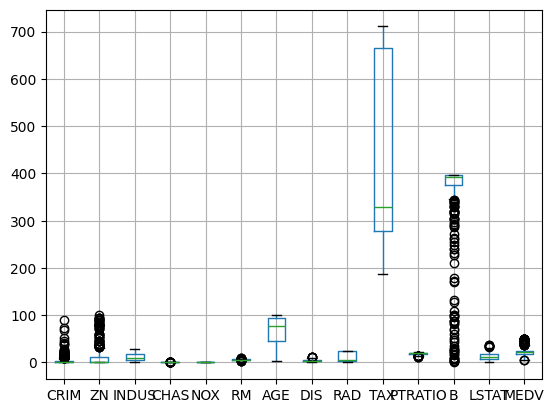

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
df.boxplot()

In [12]:
Q1 = df['MEDV'].quantile(0.25)
Q3 = df['MEDV'].quantile(0.75)
IQR = Q3 - Q1
Lower_limit = Q1 - 1.5 * IQR
Upper_limit = Q3 + 1.5 * IQR
print(f'Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}, Lower_limit = {Lower_limit},Upper_limit = {Upper_limit}')

Q1 = 17.025, Q3 = 25.0, IQR = 7.975000000000001, Lower_limit = 5.0624999999999964,Upper_limit = 36.962500000000006


In [13]:
outliers_medv=[]
for i in df.MEDV:
  if i<Lower_limit or i>Upper_limit:
    outliers_medv.append(i)
    print("outliers are",outliers_medv)

outliers are [38.7]
outliers are [38.7, 43.8]
outliers are [38.7, 43.8, 41.3]
outliers are [38.7, 43.8, 41.3, 50.0]
outliers are [38.7, 43.8, 41.3, 50.0, 50.0]
outliers are [38.7, 43.8, 41.3, 50.0, 50.0, 50.0]
outliers are [38.7, 43.8, 41.3, 50.0, 50.0, 50.0, 50.0]
outliers are [38.7, 43.8, 41.3, 50.0, 50.0, 50.0, 50.0, 37.2]
outliers are [38.7, 43.8, 41.3, 50.0, 50.0, 50.0, 50.0, 37.2, 39.8]
outliers are [38.7, 43.8, 41.3, 50.0, 50.0, 50.0, 50.0, 37.2, 39.8, 37.9]
outliers are [38.7, 43.8, 41.3, 50.0, 50.0, 50.0, 50.0, 37.2, 39.8, 37.9, 50.0]
outliers are [38.7, 43.8, 41.3, 50.0, 50.0, 50.0, 50.0, 37.2, 39.8, 37.9, 50.0, 37.0]
outliers are [38.7, 43.8, 41.3, 50.0, 50.0, 50.0, 50.0, 37.2, 39.8, 37.9, 50.0, 37.0, 50.0]
outliers are [38.7, 43.8, 41.3, 50.0, 50.0, 50.0, 50.0, 37.2, 39.8, 37.9, 50.0, 37.0, 50.0, 42.3]
outliers are [38.7, 43.8, 41.3, 50.0, 50.0, 50.0, 50.0, 37.2, 39.8, 37.9, 50.0, 37.0, 50.0, 42.3, 48.5]
outliers are [38.7, 43.8, 41.3, 50.0, 50.0, 50.0, 50.0, 37.2, 39.8, 37

DIVIDING THE DATASET INTO TEST AND TRAINING

In [14]:
df[df.MEDV<Lower_limit].index

Index([398, 405], dtype='int64')

In [15]:
X = df.drop(['MEDV'], axis = 1)
Y = df['MEDV']

In [16]:
X

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

In [17]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split( X,  Y, test_size =0.2,random_state = 0)

In [19]:
import sklearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [20]:
model=lm.fit(xtrain, ytrain)

IMPORT FOR LINEAR REGRESSION MODEL

In [21]:
model

LinearRegression()

In [22]:
ytrain_pred = lm.predict(xtrain)
ytest_pred = lm.predict(xtest)
ytrain_pred

array([32.55692655, 21.92709478, 27.54382573, 23.60318829,  6.57190962,
       14.94183849, 22.2234359 , 29.16492082, 33.24362083, 13.14592261,
       20.25607099, 20.69823381, 12.65147525, 23.36451045,  5.04647867,
       19.82921197,  9.41949932, 44.64390988, 30.78308135, 12.51377155,
       17.7083025 , 21.40137495, 23.63206936, 20.43451195, 35.01471208,
       13.84093827, 21.04977584, 35.15299117, 19.43031106, 13.17488144,
       14.10200042, 23.10677783, 14.38600111, 31.24428679, 25.30231549,
       15.41257398, 24.21291852,  9.40801187, 14.94526286, 20.83029825,
       32.74172958, 27.96372521, 25.60836003, 15.56419667, 31.11934684,
       27.96958264, 13.99703059,  7.63346533, 28.4388332 , 25.33766463,
        4.52504654, 28.38514306, 17.1896917 , 29.74225124, 20.45365104,
       15.92613078, 17.88247152, 12.73233004,  8.75151422, 19.2087374 ,
       34.49694507, 32.94684483, 23.67278817, 19.55243904, 22.8357545 ,
       26.87133257, 21.80817968, 17.06379885, 32.05027982, 10.92

In [23]:
ytrain

220    26.7
71     21.7
240    22.0
6      22.9
417    10.4
       ... 
323    18.5
192    36.4
117    19.2
47     16.6
172    23.1
Name: MEDV, Length: 404, dtype: float64

DISPLAY ALL THE STATISTICS FOR THE TRAINING AND TESTING DATASETS

In [24]:
import numpy as np
import sklearn.metrics
from sklearn.metrics import mean_absolute_error

# Model evaluation for training set
mse = sklearn.metrics.mean_squared_error(ytrain, ytrain_pred)
mae = mean_absolute_error(ytrain, ytrain_pred)
rmse = np.sqrt(mse)
r2 = sklearn.metrics.r2_score(ytrain, ytrain_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# Model evaluation for testing set
mse = sklearn.metrics.mean_squared_error(ytest, ytest_pred)
mae = mean_absolute_error(ytest, ytest_pred)
rmse = np.sqrt(mse)
r2 = sklearn.metrics.r2_score(ytest, ytest_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The model performance for training set
--------------------------------------
MAE is 3.1031563965794335
MSE is 19.326470203585725
RMSE is 4.396188144698282
R2 score is 0.7730135569264234


The model performance for testing set
--------------------------------------
MAE is 3.8429092204444983
MSE is 33.44897999767639
RMSE is 5.783509315085123
R2 score is 0.5892223849182525


PLOTTING THE LINEAR REGRESSION

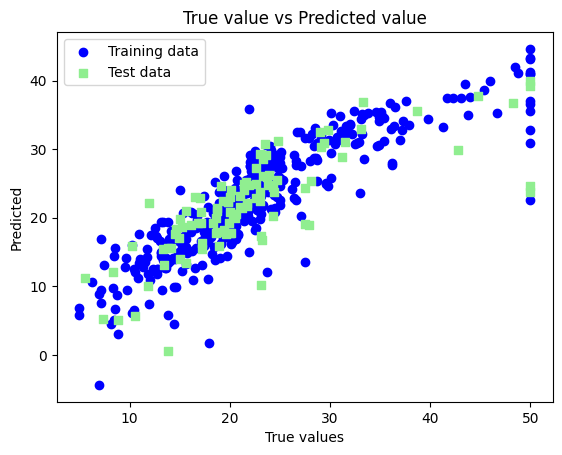

In [25]:
plt.scatter(ytrain ,ytrain_pred,c='blue',marker='o',label='Training data')
plt.scatter(ytest,ytest_pred ,c='lightgreen',marker='s',label='Test data')
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title("True value vs Predicted value")
plt.legend(loc= 'upper left')
#plt.hlines(y=0,xmin=0,xmax=50)
plt.plot()
plt.show()

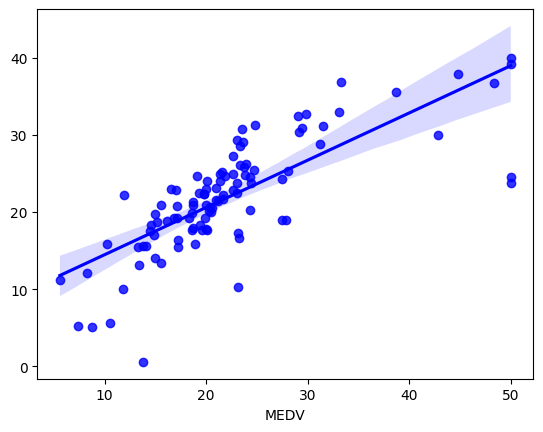

In [26]:
sns.regplot(x=ytest, y=ytest_pred, color='blue')
plt.show()

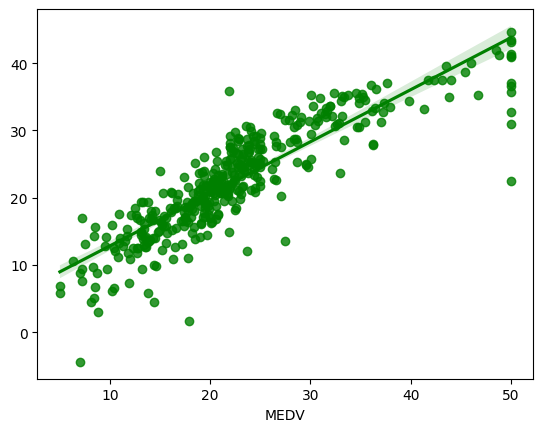

In [27]:
sns.regplot(x=ytrain, y=ytrain_pred, color='green')
plt.show()

**Conclusion**

In this way we have done data analysis using linear regression for Boston Dataset and
predict the price of houses using the features of the Boston Dataset